In [158]:
# Importando os módulos
import math
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
%matplotlib inline


In [191]:
#Dados de entrada 

# Características do sistema
k=1000       #rigidez
m=10         #massa
c=150        #amortecimento

# Condições iniciais
x0=0.1       #posição inicial
v0=6         #velocidade inivial

# número de ciclos da simulação
ciclos=4


A frequência natural em rad/s é 10.0

A frequência natural em Hz é 1.5915494309189535

O período natural em s é 0.6283185307179586

A razão de amortecimento é 0.75

A frequência natural amortecida em rad/s é 6.614378277661476

O Sistema é Subamortecido


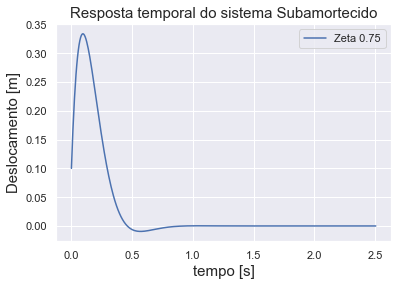

In [192]:
# frequência natural em rad/s
wn=np.sqrt(k/m)

print("\nA frequência natural em rad/s é "+str(wn))

# frequência natural em Hz
fn=wn/(2*np.pi)

print("\nA frequência natural em Hz é "+str(fn))

# período natural em segundos
tn=1/fn

print("\nO período natural em s é "+str(tn))

# razão de amortecimento
zeta=c/(2*m*wn)

print("\nA razão de amortecimento é "+str(zeta))

# frequência natural amortecida em rad/s
wd=wn*np.sqrt(1-zeta**2)

print("\nA frequência natural amortecida em rad/s é "+str(wd))

legenda_g="Zeta " +str(zeta) 

#-------------------------------------------------------------------

#vetor de tempo

passo=tn/100

tempo_final=tn*ciclos

t=np.arange(0.0,tempo_final, passo)

#--------------------------------------------------------------------

# mostrar o tipo de sistema e calculando a resposta temporal
if zeta==0:
    print("\nO Sistema é Conservativo")
    
    # RESPOSTA TRANSIENTE (homogênea)- Sistema Subamortecido ou Conservativo

    # amplitude de oscilação
    A=np.sqrt(x0**2+((v0+zeta*wn*x0)/wd)**2)

    # ângulo Phi
    phi=math.atan((x0*wd)/(v0+zeta*wn*x0))

    #resposta temporal
    xh=A*np.exp(-zeta*wn*t)*np.sin(wd*t+phi)
    
    sistema="Conservativo"
    
if zeta > 0 and zeta < 1: 
    print("\nO Sistema é Subamortecido")
    
    # RESPOSTA TRANSIENTE (homogênea)- Sistema Subamortecido ou Conservativo

    # amplitude de oscilação
    A=np.sqrt(x0**2+((v0+zeta*wn*x0)/wd)**2)

    # ângulo Phi
    phi=math.atan((x0*wd)/(v0+zeta*wn*x0))

    #resposta temporal
    xh=A*np.exp(-zeta*wn*t)*np.sin(wd*t+phi)
    
    sistema="Subamortecido"
    
if zeta==1: 
    print("\nO Sistema é Criticamente Amortecido")

    c1=x0
    
    c2=v0+wn*x0
    
    xh=np.exp(-wn*t)*(c1+c2*t)
    
    sistema="Criticamente Amortecido"
    
if zeta>1 :
    print("\nO Sistema é Superamortecido") 
    
    c1=(x0*wn*(zeta+np.sqrt(zeta**2-1))+v0)/(2*wn*np.sqrt(zeta**2-1))
    
    c2=(-x0*wn*(zeta-np.sqrt(zeta**2-1))-v0)/(2*wn*np.sqrt(zeta**2-1))
    
    xh=c1*np.exp((-zeta+np.sqrt(zeta**2-1))*wn*t)+c2*np.exp((-zeta-np.sqrt(zeta**2-1))*wn*t)
    
    sistema="Superamortecido"
    
#gráfico da resposta temporal
fig, ax = plt.subplots()
sns.lineplot(x=t, y=xh, label=legenda_g)
ax.set_title('Resposta temporal do Sistema '+sistema, fontsize= 15)
plt.ylabel("Deslocamento [m]", fontsize= 15)
plt.xlabel("tempo [s]", fontsize= 15)
plt.show()